# Data reading
We used the [healthcare-dataset-stroke-data.csv](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) dataset. This dataset is loaded using the read_csv function from pandas, the shape and first 5 columns are shown. As can be seen, there are 5110 rows with 10 attributes, since the 'id' and 'stroke' column are not attributes.

In [6]:
import pandas as pd

raw_data =  pd.read_csv("data/healthcare-dataset-stroke-data.csv")
print(f"Shape of data: {raw_data.shape}")
raw_data.head()


Shape of data: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Rows with missing values
As can be seen below, there are 201 rows with a missing value for bmi. Since this is a relative small amount, we decided to replace these values with the median of the bmi column, since the median is more robust to outliers than the mean.

In [7]:
import numpy as np

print(f"Amount of NaN values per attribute:\n{raw_data.isnull().sum()}\n")
raw_data["bmi"].replace(to_replace=np.nan, value=raw_data.bmi.median(), inplace=True)
print(
    f"Amount of NaN values per attribute after replacing:\n{raw_data.isnull().sum()}"
)


Amount of NaN values per attribute:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Amount of NaN values per attribute after replacing:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Data vizualisation

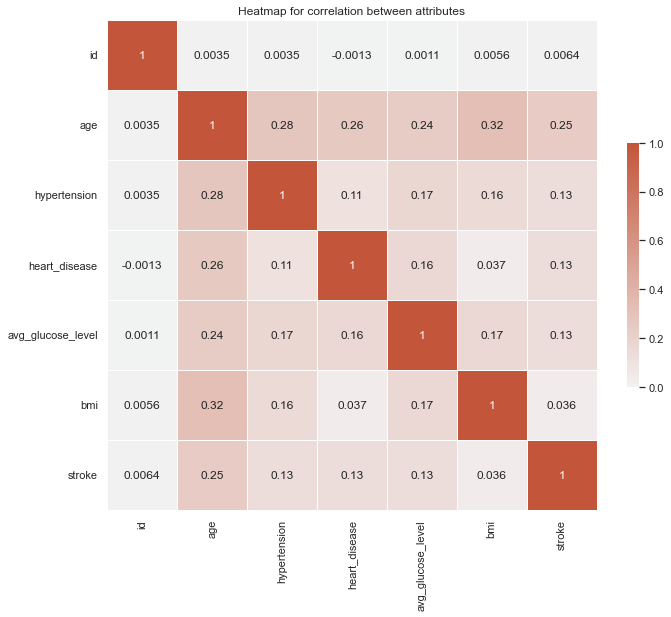

Figure 1: Heatmap for correlation between attributes.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

corr = raw_data.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    ax=ax,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    cbar_kws={"shrink": 0.5},
)
ax.set_title("Heatmap for correlation between attributes")

plt.show()
print("Figure 1: Heatmap for correlation between attributes.")


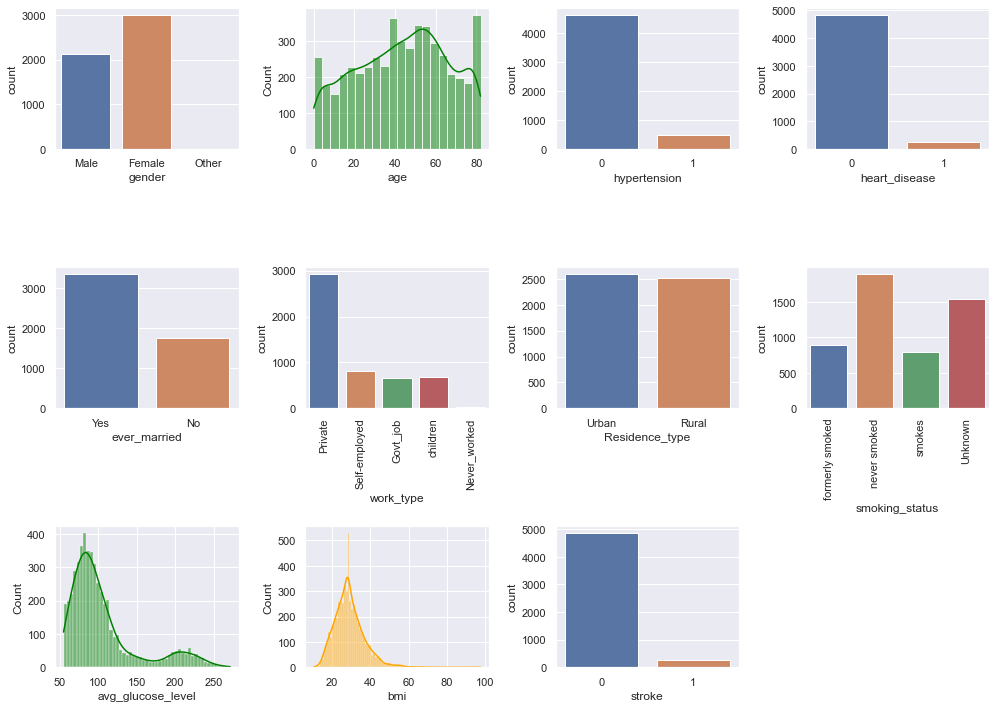

Figure 2: Count plots for each attribute in the data set.


In [9]:
fig, ax = plt.subplots(3, 4, figsize=(14, 10))

sns.countplot(data=raw_data, x="gender", ax=ax[0, 0])
# sns.countplot(data=raw_data, x="age", ax=ax[0, 1])

sns.histplot(
    raw_data.age,
    color="green",
    label="age",
    kde=True,
    ax=ax[0, 1],
)

sns.countplot(data=raw_data, x="hypertension", ax=ax[0, 2])
sns.countplot(data=raw_data, x="heart_disease", ax=ax[0, 3])

sns.countplot(data=raw_data, x="ever_married", ax=ax[1, 0])
sns.countplot(data=raw_data, x="work_type", ax=ax[1, 1])
ax[1, 1].tick_params(axis="x", rotation=90)
sns.countplot(data=raw_data, x="Residence_type", ax=ax[1, 2])
sns.countplot(data=raw_data, x="smoking_status", ax=ax[1, 3])
ax[1, 3].tick_params(axis="x", rotation=90)


sns.histplot(
    raw_data.avg_glucose_level,
    color="green",
    label="avg_glucose_level",
    kde=True,
    ax=ax[2, 0],
)
sns.histplot(raw_data.bmi, color="orange", label="bmi", kde=True, ax=ax[2, 1])
sns.countplot(data=raw_data, x="stroke", ax=ax[2, 2])

fig.delaxes(ax[2,3])

plt.tight_layout()
plt.show()
print("Figure 2: Count plots for each attribute in the data set.")

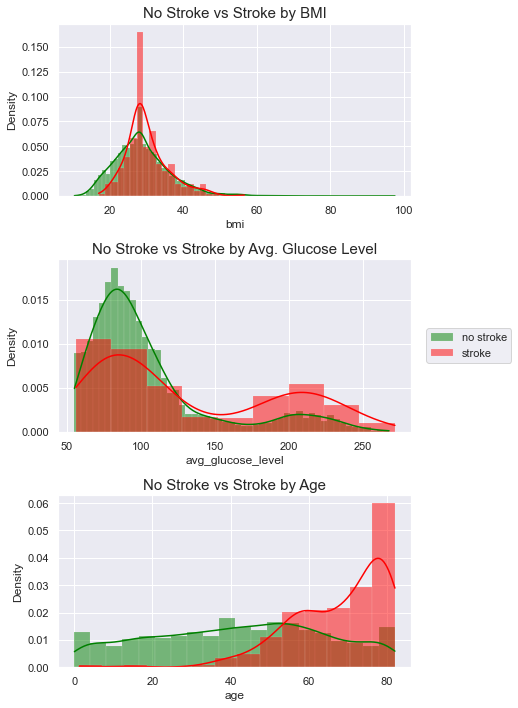

Figure 3: Density plots comparing two attributes.


In [10]:
fig, ax = plt.subplots(3, 1, figsize=(6, 10))

sns.histplot(
    raw_data[raw_data["stroke"] == 0]["bmi"],
    color="green",
    kde=True,
    stat="density",
    linewidth=0.1,
    ax=ax[0],
    label="no stroke"
)
sns.histplot(
    raw_data[raw_data["stroke"] == 1]["bmi"],
    color="red",
    kde=True,
    stat="density",
    linewidth=0.1,
    ax=ax[0],
    label="stroke"
)
ax[0].set_title("No Stroke vs Stroke by BMI", fontsize=15)

sns.histplot(
    raw_data[raw_data["stroke"] == 0]["avg_glucose_level"],
    color="green",
    kde=True,
    stat="density",
    linewidth=0.1,
    ax=ax[1],
    label="no stroke"
)
sns.histplot(
    raw_data[raw_data["stroke"] == 1]["avg_glucose_level"],
    color="red",
    kde=True,
    stat="density",
    linewidth=0.1,
    ax=ax[1],
    label="stroke"
)
ax[1].set_title("No Stroke vs Stroke by Avg. Glucose Level", fontsize=15)

sns.histplot(
    raw_data[raw_data["stroke"] == 0]["age"],
    color="green",
    kde=True,
    stat="density",
    linewidth=0.1,
    ax=ax[2],
    label="no stroke"
)
sns.histplot(
    raw_data[raw_data["stroke"] == 1]["age"],
    color="red",
    kde=True,
    stat="density",
    linewidth=0.1,
    ax=ax[2],
    label="stroke"
)
ax[2].set_title("No Stroke vs Stroke by Age", fontsize=15)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.3, 2))
plt.show()
print("Figure 3: Density plots comparing two attributes.")


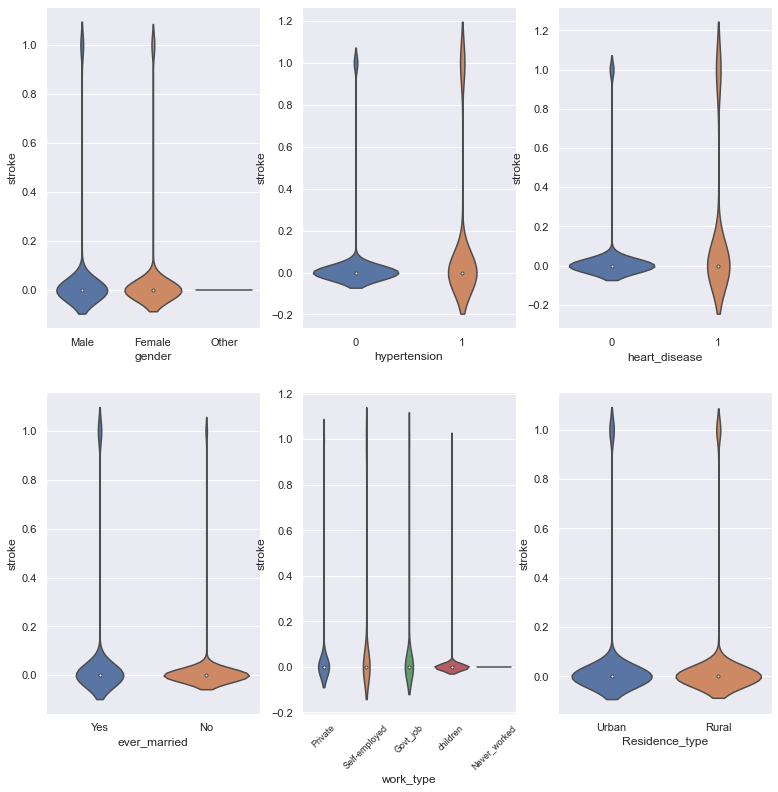

Figure 4: Violin plots for some features.


In [11]:
plt.figure(figsize=(13, 13))
sns.set_theme(style="darkgrid")

plt.subplot(2, 3, 1)
sns.violinplot(x="gender", y="stroke", data=raw_data)

plt.subplot(2, 3, 2)
sns.violinplot(x="hypertension", y="stroke", data=raw_data)

plt.subplot(2, 3, 3)
sns.violinplot(x="heart_disease", y="stroke", data=raw_data)

plt.subplot(2, 3, 4)
sns.violinplot(x="ever_married", y="stroke", data=raw_data)

plt.subplot(2, 3, 5)
sns.violinplot(x="work_type", y="stroke", data=raw_data)
plt.xticks(fontsize=9, rotation=45)

plt.subplot(2, 3, 6)
sns.violinplot(x="Residence_type", y="stroke", data=raw_data)
plt.show()
print("Figure 4: Violin plots for some features.")


<Figure size 720x720 with 0 Axes>

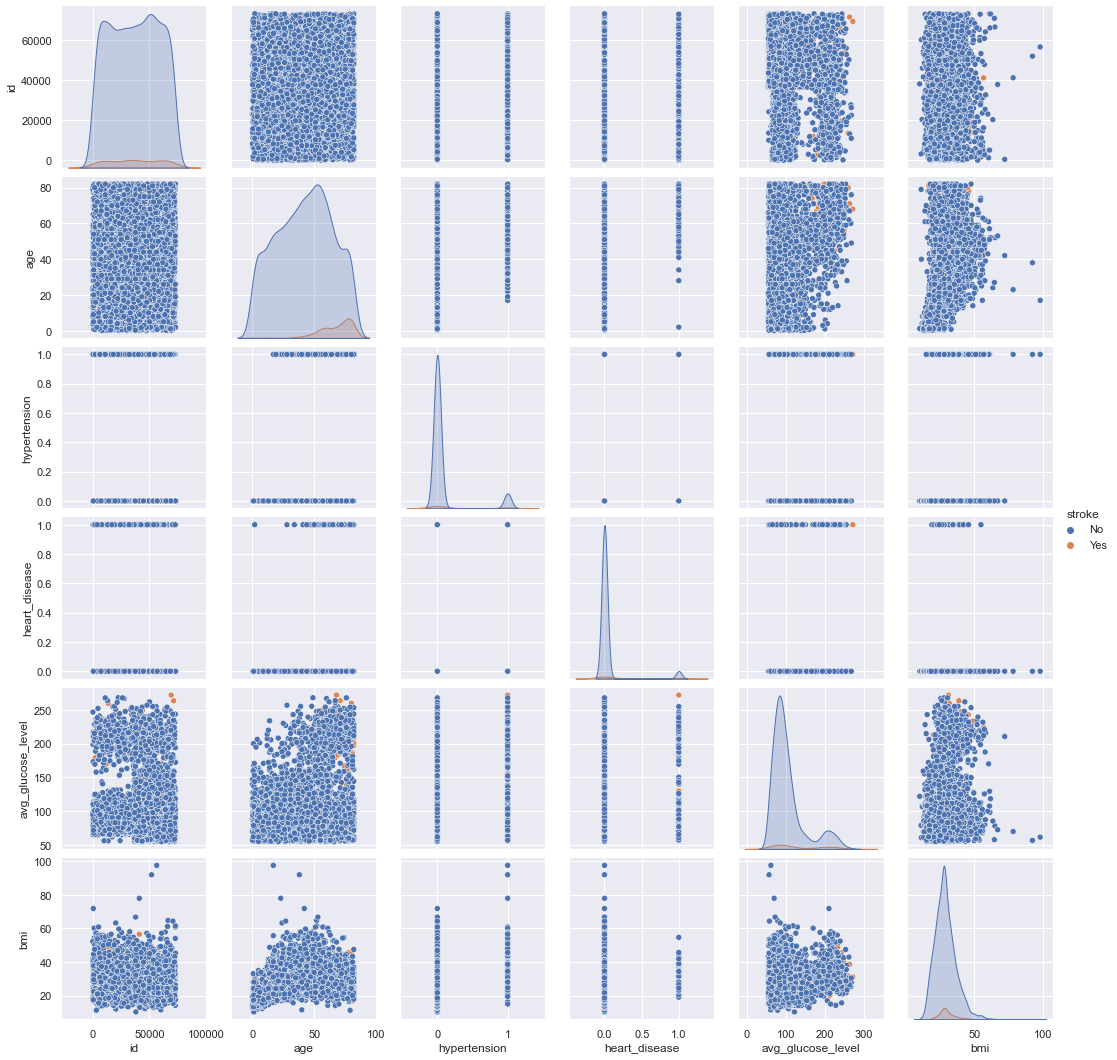

Figure 5: Pair plot for the features in the data set.


In [12]:
fig = plt.figure(figsize=(10,10))
pairplot = sns.pairplot(raw_data, hue="stroke")
labels = ["No", "Yes"]
for text, label in zip(pairplot._legend.texts, labels):
    text.set_text(label)
plt.show()
print("Figure 5: Pair plot for the features in the data set.")

# Data Preprocessing
Remove the ID column.

In [13]:
x = raw_data.iloc[:, 1:-1].values
y = raw_data.iloc[:, -1].values
x


array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.1, 'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [14]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Categorical encoding
The columns "gender", "work_type" and "smoking_status" contain 3 or more categories, so it cannot be binary encoded. Therefore, we use using categorial to encode these columns.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [0, 5, 9])], remainder="passthrough"
)
x = np.array(ct.fit_transform(x))
x


array([[0.0, 1.0, 0.0, ..., 'Urban', 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 'Rural', 202.21, 28.1],
       [0.0, 1.0, 0.0, ..., 'Rural', 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 'Rural', 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 'Rural', 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 'Urban', 85.28, 26.2]], dtype=object)

## Label encoding
The columns "ever_married" and "residence_type" contain just two categories, so they can be binary encoded. Therefore we use a label encoder for these two columns. These data are now present in columns 15 and 16, since the categorial encoding algorithm added columns to the data.

In [16]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

x


array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 28.1],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

## Splitting data into training set and test set
To train different models, the dataset needs to be split into a train and test set. The train set will be used to train the model, the test set will be used to test the performance of the model.

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(f"Number transactions x_train dataset: {x_train.shape}")
print(f"Number transactions y_train dataset: {y_train.shape}")
print(f"Number transactions x_test dataset: {x_test.shape}")
print(f"Number transactions y_test dataset: {y_test.shape}")


Number transactions x_train dataset: (4088, 19)
Number transactions y_train dataset: (4088,)
Number transactions x_test dataset: (1022, 19)
Number transactions y_test dataset: (1022,)


## Feature scaling
We use standardscaler to standardize the features by removing the mean and scaling them to unit variance. By scaling the features to unit variance, the values will be divided by the standard deviation. Standardscaler will result in a distribution with a standard deviation equal to 1.

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## Handling imbalance
Since there are quite some attributes with imbalanced data, we use SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for the minority class. This helps to overcome overfitting.

In [19]:
from imblearn.over_sampling import SMOTE

print(f"Before OverSampling, the shape of train_X: {x_train.shape}")
print(f"Before OverSampling, the shape of train_y: {y_train.shape}")
print(f"Before OverSampling, the shape of test_X: {x_test.shape}")
print(f"Before OverSampling, the shape of test_y: {y_test.shape} \n")

print(f"Before OverSampling, counts of label '1' in train set: {sum(y_train == 1)}")
print(f"Before OverSampling, counts of label '0' in train set: {sum(y_train == 0)}")
print(f"Before OverSampling, counts of label '1' in test set: {sum(y_test == 1)}")
print(f"Before OverSampling, counts of label '0' in test set: {sum(y_test == 0)} \n")

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
x_test_res, y_test_res = sm.fit_resample(x_test, y_test.ravel())

print(f"After OverSampling, the shape of train_X: {x_train_res.shape}")
print(f"After OverSampling, the shape of train_y: {y_train_res.shape}")
print(f"After OverSampling, the shape of test_X: {x_test_res.shape}")
print(f"After OverSampling, the shape of test_y: {y_test_res.shape} \n")

print(f"After OverSampling, counts of label '1' in train set: {sum(y_train_res == 1)}")
print(f"After OverSampling, counts of label '0' in train set: {sum(y_train_res == 0)}")
print(f"After OverSampling, counts of label '1' in test set: {sum(y_test_res == 1)}")
print(f"After OverSampling, counts of label '0' in test set: {sum(y_test_res == 0)}")


Before OverSampling, the shape of train_X: (4088, 19)
Before OverSampling, the shape of train_y: (4088,)
Before OverSampling, the shape of test_X: (1022, 19)
Before OverSampling, the shape of test_y: (1022,) 

Before OverSampling, counts of label '1' in train set: 195
Before OverSampling, counts of label '0' in train set: 3893
Before OverSampling, counts of label '1' in test set: 54
Before OverSampling, counts of label '0' in test set: 968 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, the shape of test_X: (1936, 19)
After OverSampling, the shape of test_y: (1936,) 

After OverSampling, counts of label '1' in train set: 3893
After OverSampling, counts of label '0' in train set: 3893
After OverSampling, counts of label '1' in test set: 968
After OverSampling, counts of label '0' in test set: 968


# Model selection
We try different types of algorithms that implement decision trees. Here we test a regular DecisionTreeClassifier, a RandomForestClassifier, an AdaBoostClassifier, a BaggingClassifier and an XGBClassifier. We use a random state of 0 to be able to reproduce the results. For each different algorithm, the accuracy score, cross validation mean, cross validation standard deviation, roc value, precision, recall and f1 score are calculated and are shown in a table. We can see very similar results for each algorithm, but the best two are the XGBClassifier and the RandomForestClassifier.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import cross_val_score

models = [
    ["DecisionTreeClassifier", DecisionTreeClassifier(random_state=0)],
    ["RandomForestClassifier", RandomForestClassifier(random_state=0)],
    ["AdaBoostClassifier", AdaBoostClassifier(random_state=0)],
    ["BaggingClassifier", BaggingClassifier(random_state=0)],
    ["XGBClassifier", XGBClassifier(eval_metric="error", use_label_encoder=False)],
]

lst_1 = []

for m in models:
    lst_2 = []
    model = m[1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test_res)
    accuracies = cross_val_score(estimator=model, X=x_train_res, y=y_train_res, cv=10)
    roc = roc_auc_score(y_test_res, y_pred)
    precision = precision_score(y_test_res, y_pred)
    recall = recall_score(y_test_res, y_pred)
    f1 = f1_score(y_test_res, y_pred)
    lst_1.append(
        [
            m[0],
            (accuracy_score(y_test_res, y_pred)) * 100,
            accuracies.mean() * 100,
            accuracies.std() * 100,
            roc,
            precision,
            recall,
            f1,
        ]
    )

model_eval = pd.DataFrame(
    lst_1,
    columns=[
        "Model",
        "Accuracy",
        "K-Fold Mean Accuracy",
        "Std. Deviation",
        "ROC AUC",
        "Precision",
        "Recall",
        "F1",
    ],
)
model_eval.sort_values(
    by=["Accuracy", "K-Fold Mean Accuracy"], inplace=True, ascending=False
)

print("Table 1: Performance measures for each algorithm")
model_eval


Table 1: Performance measures for each algorithm


,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
4,XGBClassifier,92.561983,95.647030,6.051952,0.925620,0.974654,0.873967,0.921569
2,AdaBoostClassifier,83.884298,84.831865,2.353631,0.838843,0.821569,0.865702,0.843058
1,RandomForestClassifier,78.925620,95.697585,1.410753,0.789256,0.928135,0.627066,0.748459
0,DecisionTreeClassifier,75.878099,90.688774,2.321971,0.758781,0.870015,0.608471,0.716109
3,BaggingClassifier,71.849174,93.745293,2.240218,0.718492,0.899811,0.491736,0.635939


## Tuning the models
For each model above, we used the standard hyperparameters. However, this might not give the best results. Therefore, we want to find out what the best hyperparameters would be for each algorithm. We use GridSearchCV to help find the best hyperparameters so that we can make models again, but this time with the best hyperparameters for the best results.

In [21]:
from sklearn.model_selection import GridSearchCV

grid_models = [
    (
        DecisionTreeClassifier(),
        [{"criterion": ["gini", "entropy"], "random_state": [0]}],
    ),
    (
        RandomForestClassifier(),
        [
            {
                "bootstrap": [True, False],
                "n_estimators": [100, 150, 200],
                "criterion": ["gini", "entropy"],
                "random_state": [0],
            }
        ],
    ),
    (
        AdaBoostClassifier(),
        [
            {
                "base_estimator": [DecisionTreeClassifier()],
                "algorithm": ["SAMME", "SAMME.R"],
                "n_estimators": [50, 100, 150],
                "learning_rate": [0.01, 0.05, 0.1],
                "random_state": [0],
            }
        ],
    ),
    (
        BaggingClassifier(),
        [
            {
                "bootstrap": [True, False],
                "bootstrap_features": [True, False],
                "n_estimators": [5, 10, 15],
                "max_samples": [0.6, 0.8, 1.0],
                "random_state": [0],
            }
        ],
    ),
    (
        XGBClassifier(use_label_encoder=False),
        [{"learning_rate": [0.01, 0.05, 0.1], "eval_metric": ["error"]}],
    ),
]

for estimator, params in grid_models:
    grid = GridSearchCV(estimator=estimator, param_grid=params, scoring="accuracy", cv=10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(f"{estimator}:\nBest Accuracy : {best_accuracy * 100:.2f}%")
    print(f"Best Parameters: {best_param}\n")
    print("----------------\n")


DecisionTreeClassifier():
Best Accuracy : 91.07%
Best Parameters: {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 96.30%
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}

----------------

AdaBoostClassifier():
Best Accuracy : 90.91%
Best Parameters: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 0}

----------------

BaggingClassifier():
Best Accuracy : 95.93%
Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_samples': 1.0, 'n_estimators': 15, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta

## Make models with best hyperparameters
By looking at the results of the GridSearchCV, we can see that the RandomForestClassifier has the highest accuracy, closely followeed by the BaggingClassifier. Therefore, we construct a RandomForestClassifier and a BaggingClassifier with the suggested hyperparameters.

In [22]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
)
from sklearn.model_selection import cross_val_score


def print_plot_metrics(
    y_test, y_pred_1, y_prob_1, algorithm_1, y_pred_2, y_prob_2, algorithm_2
):
    cm_1 = confusion_matrix(y_test, y_pred_1)
    cm_2 = confusion_matrix(y_test, y_pred_2)

    print(f"{algorithm_1}:\n{classification_report(y_test, y_pred_1)}")
    print(f"ROC AUC score: {roc_auc_score(y_test, y_prob_1)}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_1)}\n")

    print(f"{algorithm_2}:\n{classification_report(y_test, y_pred_2)}")
    print(f"ROC AUC score: {roc_auc_score(y_test, y_prob_2)}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_2)}")

    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    # Confusion Matrix
    sns.heatmap(
        cm_1,
        annot=True,
        fmt="d",
        annot_kws={"fontsize": 15},
        yticklabels=["Actual no stroke", "Actual stroke"],
        xticklabels=["Predicted no stroke", "Predicted stroke"],
        ax=ax[0, 0],
    )
    ax[0, 0].tick_params(axis="y", rotation=0)
    ax[0, 0].set_title(algorithm_1, fontweight="bold")

    sns.heatmap(
        cm_2,
        annot=True,
        fmt="d",
        annot_kws={"fontsize": 15},
        yticklabels=["Actual no stroke", "Actual stroke"],
        xticklabels=["Predicted no stroke", "Predicted stroke"],
        ax=ax[0, 1],
    )

    ax[0, 1].tick_params(axis="y", rotation=0)
    ax[0, 1].set_title(algorithm_2, fontweight="bold")

    # Roc AUC Curve
    false_positive_rate_1, true_positive_rate_1, _ = roc_curve(y_test, y_prob_1)
    roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

    ax[1, 0].plot(
        false_positive_rate_1,
        true_positive_rate_1,
        color="#b01717",
        label=f"Test Baseline (AUC = {roc_auc_1:0.3f})",
    )
    ax[1, 0].legend(loc="lower right")
    ax[1, 0].plot([0, 1], [0, 1], linestyle="--", color="#174ab0")
    ax[1, 0].set_ylabel("True Positives [%]")
    ax[1, 0].set_xlabel("False Positives [%]")
    ax[1, 0].set_title(algorithm_1, fontweight="bold")

    false_positive_rate_2, true_positive_rate_2, _ = roc_curve(y_test, y_prob_2)
    roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2)

    ax[1, 1].plot(
        false_positive_rate_2,
        true_positive_rate_2,
        color="#b01717",
        label=f"Test Baseline (AUC = {roc_auc_2:0.3f}",
    )
    ax[1, 1].legend(loc="lower right")
    ax[1, 1].plot([0, 1], [0, 1], linestyle="--", color="#174ab0")
    ax[1, 1].set_ylabel("True Positives [%]")
    ax[1, 1].set_xlabel("False Positives [%]")
    ax[1, 1].set_title(algorithm_2, fontweight="bold")
    plt.tight_layout()
    plt.show()


## RandomForestClassifier

In [23]:
random_forest = RandomForestClassifier(
    bootstrap=False, criterion="entropy", n_estimators=150, random_state=0
)
random_forest.fit(x_train_res, y_train_res)
y_pred_random_forest = random_forest.predict(x_test_res)
y_prob_random_forest = random_forest.predict_proba(x_test_res)[:, 1]

## BaggingClassifier

In [24]:
bagging = BaggingClassifier(
    bootstrap=False,
    bootstrap_features=True,
    max_samples=1.0,
    n_estimators=15,
    random_state=0,
)
bagging.fit(x_train_res, y_train_res)
y_pred_bagging = bagging.predict(x_test_res)
y_prob_bagging = bagging.predict_proba(x_test_res)[:, 1]


RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       968
           1       0.94      0.63      0.75       968

    accuracy                           0.79      1936
   macro avg       0.83      0.79      0.79      1936
weighted avg       0.83      0.79      0.79      1936

ROC AUC score: 0.9354941815791271
Accuracy Score: 0.7928719008264463

BaggingClassifier:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       968
           1       0.96      0.75      0.84       968

    accuracy                           0.86      1936
   macro avg       0.88      0.86      0.86      1936
weighted avg       0.88      0.86      0.86      1936

ROC AUC score: 0.9554861988593676
Accuracy Score: 0.8600206611570248


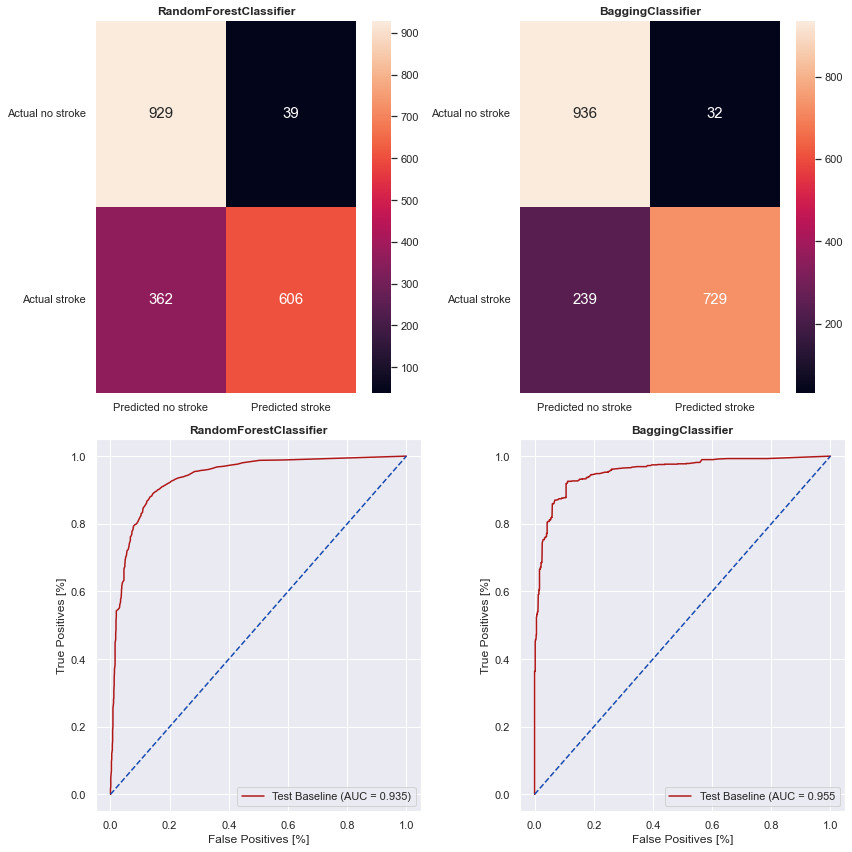

Figure 6: Confusion matrix and ROC-curve for RandomForestClassifier and BaggingClassifier.


In [25]:
print_plot_metrics(y_test_res, y_pred_random_forest, y_prob_random_forest, "RandomForestClassifier",  y_pred_bagging, y_prob_bagging, "BaggingClassifier")
print("Figure 6: Confusion matrix and ROC-curve for RandomForestClassifier and BaggingClassifier.")